In [1]:
#install.packages('Metrics')
library('astsa')
library(forecast)
library('Metrics')

options(repr.plot.width=14, repr.plot.height=6)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas



Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




In [3]:
setwd('./')
#ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_resampled.csv")
ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_no_weekends_resampled.csv")

In [4]:
ts_df <- ts_df[,2]

x = ts(ts_df, start=0 , frequency=1)


In [5]:
x = x/300000 # paso la unidad a slots

In [6]:
ts_df = ts_df/300000 # paso la unidad a slots

In [7]:
ts_df = ts(ts_df, start=0, frequency=1)

In [8]:
length(ts_df)

[1] 6048

In [9]:
time(ts_df)

A Time Series:
   [1]    0    1    2    3    4    5    6    7    8    9   10   11   12   13
  [15]   14   15   16   17   18   19   20   21   22   23   24   25   26   27
  [29]   28   29   30   31   32   33   34   35   36   37   38   39   40   41
  [43]   42   43   44   45   46   47   48   49   50   51   52   53   54   55
  [57]   56   57   58   59   60   61   62   63   64   65   66   67   68   69
  [71]   70   71   72   73   74   75   76   77   78   79   80   81   82   83
  [85]   84   85   86   87   88   89   90   91   92   93   94   95   96   97
  [99]   98   99  100  101  102  103  104  105  106  107  108  109  110  111
 [113]  112  113  114  115  116  117  118  119  120  121  122  123  124  125
 [127]  126  127  128  129  130  131  132  133  134  135  136  137  138  139
 [141]  140  141  142  143  144  145  146  147  148  149  150  151  152  153
 [155]  154  155  156  157  158  159  160  161  162  163  164  165  166  167
 [169]  168  169  170  171  172  173  174  175  176  177  178  179  180  181
 [183]  182  183  184  185  186  187  188  189  190  191  192  193  194  195
 [197]  196  197  198  199  200  201  202  203  204  205  206  207  208  209
 [211]  210  211  212  213  214  215  216  217  218  219  220  221  222  223
 [225]  224  225  226  227  228  229  230  231  232  233  234  235  236  237
 [239]  238  239  240  241  242  243  244  245  246  247  248  249  250  251
 [253]  252  253  254  255  256  257  258  259  260  261  262  263  264  265
 [267]  266  267  268  269  270  271  272  273  274  275  276  277  278  279
 [281]  280  281  282  283  284  285  286  287  288  289  290  291  292  293
 [295]  294  295  296  297  298  299  300  301  302  303  304  305  306  307
 [309]  308  309  310  311  312  313  314  315  316  317  318  319  320  321
 [323]  322  323  324  325  326  327  328  329  330  331  332  333  334  335
 [337]  336  337  338  339  340  341  342  343  344  345  346  347  348  349
 [351]  350  351  352  353  354  355  356  357  358  359  360  361  362  363
 [365]  364  365  366  367  368  369  370  371  372  373  374  375  376  377
 [379]  378  379  380  381  382  383  384  385  386  387  388  389  390  391
 [393]  392  393  394  395  396  397  398  399  400  401  402  403  404  405
 [407]  406  407  408  409  410  411  412  413  414  415  416  417  418  419
 [421]  420  421  422  423  424  425  426  427  428  429  430  431  432  433
 [435]  434  435  436  437  438  439  440  441  442  443  444  445  446  447
 [449]  448  449  450  451  452  453  454  455  456  457  458  459  460  461
 [463]  462  463  464  465  466  467  468  469  470  471  472  473  474  475
 [477]  476  477  478  479  480  481  482  483  484  485  486  487  488  489
 [491]  490  491  492  493  494  495  496  497  498  499  500  501  502  503
 [505]  504  505  506  507  508  509  510  511  512  513  514  515  516  517
 [519]  518  519  520  521  522  523  524  525  526  527  528  529  530  531
 [533]  532  533  534  535  536  537  538  539  540  541  542  543  544  545
 [547]  546  547  548  549  550  551  552  553  554  555  556  557  558  559
 [561]  560  561  562  563  564  565  566  567  568  569  570  571  572  573
 [575]  574  575  576  577  578  579  580  581  582  583  584  585  586  587
 [589]  588  589  590  591  592  593  594  595  596  597  598  599  600  601
 [603]  602  603  604  605  606  607  608  609  610  611  612  613  614  615
 [617]  616  617  618  619  620  621  622  623  624  625  626  627  628  629
 [631]  630  631  632  633  634  635  636  637  638  639  640  641  642  643
 [645]  644  645  646  647  648  649  650  651  652  653  654  655  656  657
 [659]  658  659  660  661  662  663  664  665  666  667  668  669  670  671
 [673]  672  673  674  675  676  677  678  679  680  681  682  683  684  685
 [687]  686  687  688  689  690  691  692  693  694  695  696  697  698  699
 [701]  700  701  702  703  704  705  706  707  708  709  710  711  712  713
 [715]  714  715  716  717  718  719  720  721  722  723  

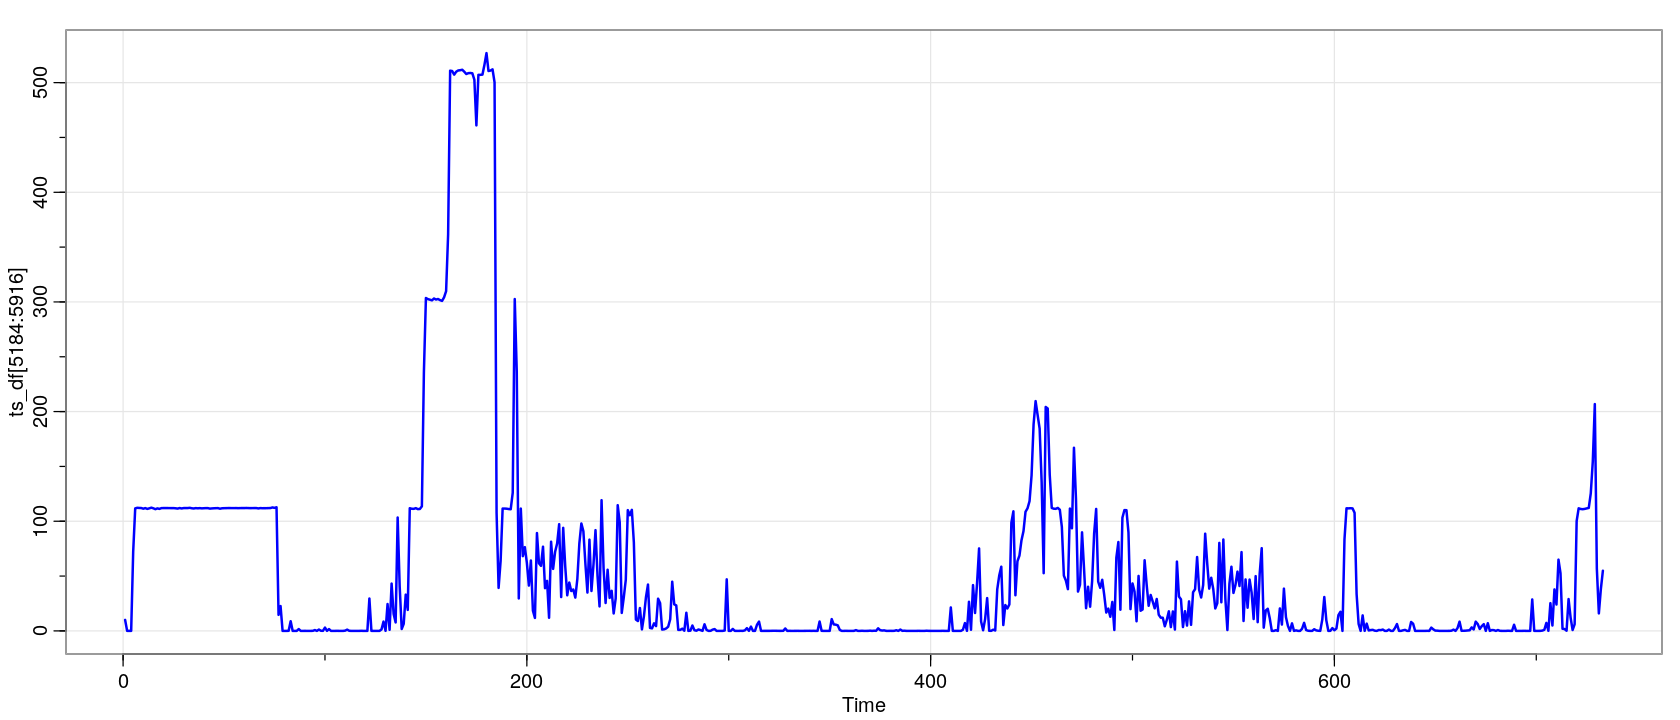

In [10]:
# dias 19 al 21 de mayo (arranca en 18*288=5184)
tsplot(ts_df[5184:5916], col=4, lwd=2)

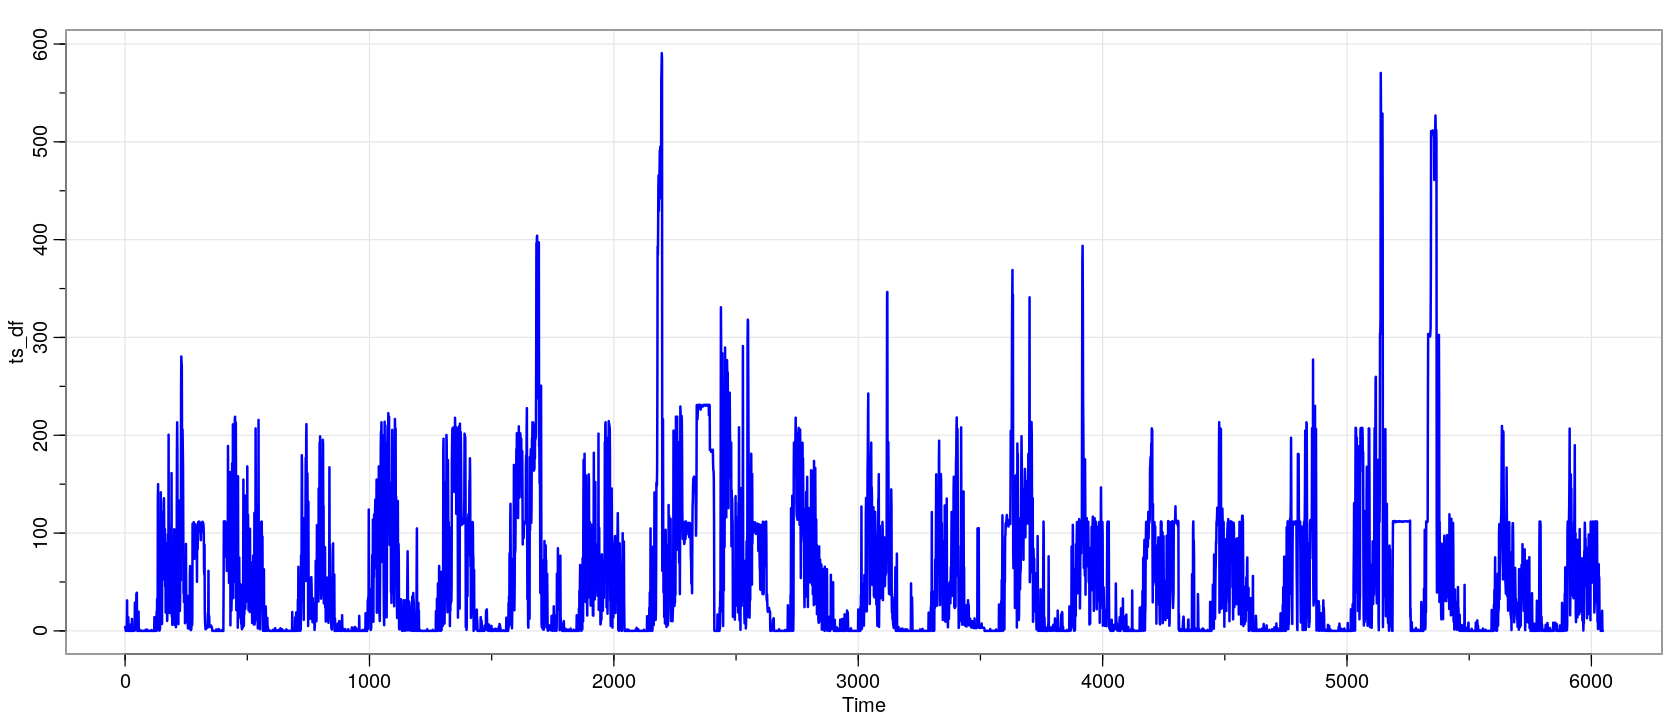

In [11]:
tsplot(ts_df, col=4, lwd=2)

In [12]:

train_predict <- function(start_train, start_test, time_series) {
    
    ret = c(0,0)
    
    ts_length = length(time_series)        
    
    end_train = start_test - 1

    ts_df_train = ts(time_series[start_train:end_train], start=start_train-1, frequency=1)
    ts_df_test = ts(time_series[start_test:ts_length], start=start_test-1, frequency=1)
    
    dn = ts_df_train
    dnt = ts_df_test
    
    # agrego para probar +1 para evitar log(0)
    ldn = log(dn+1)
    ldnt = log(dnt+1)
    t = time(ldn)
    
    fit = lm(ldn ~ t, na.action=NULL)
    
    ndata <- data.frame(t = start_test-1)
    
    predict_trend = predict(fit,newdata=ndata)
    
    predicttrend = ts(fitted(fit), start=start_train-1, freq=1)
    
    ldn = as.numeric(ldn)
    ldnc = ldn-predicttrend
      
    t = time(ldnc)

    f1 =  0.000192
    f2 =  0.000385
    f3 =  0.000578
    f4 =  0.000771
    f5 =  0.000964
    f6 =  0.001157
    f7 =  0.002507
    f8 =  0.002893
    f9 =  0.003472
    f10 = 0.004436
    f11 = 0.006944
    f12 = 0.010416    

    fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) +
                      cos(2*pi*f2*t) + sin(2*pi*f2*t) +
                     cos(2*pi*f3*t) + sin(2*pi*f3*t) +
                    cos(2*pi*f4*t) + sin(2*pi*f4*t) +
                     cos(2*pi*f5*t) + sin(2*pi*f5*t) +
                     cos(2*pi*f6*t) + sin(2*pi*f6*t) +
                     cos(2*pi*f7*t) + sin(2*pi*f7*t) +
                     cos(2*pi*f8*t) + sin(2*pi*f8*t) +
                     cos(2*pi*f9*t) + sin(2*pi*f9*t) +
                     cos(2*pi*f10*t) + sin(2*pi*f10*t) +
                     cos(2*pi*f11*t) + sin(2*pi*f11*t) +
                     cos(2*pi*f12*t) + sin(2*pi*f12*t),
             na.action=NULL)
    
    prediction = ts(fitted(fit), start=start_train-1, freq=1)
    
    #tn = ts_length
    tn = start_test - 1 
            
    v = 0 + cos(2*pi*f1*tn) + sin(2*pi*f1*tn) +
                  cos(2*pi*f2*tn) + sin(2*pi*f2*tn) +
                 cos(2*pi*f3*tn) + sin(2*pi*f3*tn) +
                cos(2*pi*f4*tn) + sin(2*pi*f4*tn) +
                 cos(2*pi*f5*tn) + sin(2*pi*f5*tn) +
                 cos(2*pi*f6*tn) + sin(2*pi*f6*tn) +
                 cos(2*pi*f7*tn) + sin(2*pi*f7*tn) +
                 cos(2*pi*f8*tn) + sin(2*pi*f8*tn) +
                 cos(2*pi*f9*tn) + sin(2*pi*f9*tn) +
                 cos(2*pi*f10*tn) + sin(2*pi*f10*tn) +
                 cos(2*pi*f11*tn)+ sin(2*pi*f11*tn) +
                 cos(2*pi*f12*tn) + sin(2*pi*f12*tn)

    vdf <- data.frame(t = v)
    fore_f = predict(fit, vdf)    

    res = (ts(residuals(fit), start=start_train -1, freq=1))

    ldncr1 = res
        
    #fit = Arima(ldncr1, order = c(6,0,0), include.mean=FALSE)
    fit = Arima(ldncr1, order = c(6,0,0), include.mean=FALSE, 
                seasonal = list(order = c(6,0,0), period = 6))
    fore = forecast(fit, h=1)   
    
    ldnt = as.numeric(ldnt)
    
    e = exp(1)

    ldnt = ts(ldnt, start=start_test -1, frequency=1)    
    
    v_ldnt = ldnt #c + predictiont
    v_pred = fore$mean + fore_f + predict_trend

    v_ldnt = (e^v_ldnt) 
    v_pred = (e^v_pred) 
    
    v_ldnt[1:5]
    v_pred[1:5]
    ret = c(v_ldnt[1], v_pred[1], time(v_ldnt)[1], time(v_pred)[1])
    
    return(ret)
    
}

In [ ]:
#testv <- train_predict(6500-6400, 6500, ts_df)
#testv

In [ ]:
start_train = 1
start_test = 5306
# time serie : ts_df
testv <- train_predict(start_train, start_test, ts_df)
print(paste("observed -", "prediction"))
testv

In [ ]:
df_validation <- data.frame(observed=double(), predicted=double(), timeo=integer(), timep=integer())

vect_obs <- c()
vect_pred <- c()

for (i in (5290:5700)) {   
    print(i)
    #print(paste0("parametros: ", i-5180, " ", i))
    testv <- train_predict(i-5290, i, ts_df)
    vect_obs <- append(vect_obs, testv[1])
    vect_pred <- append(vect_pred, testv[2])
    #print(testv)
    df_validation[nrow(df_validation)+1,] = testv
}

In [ ]:
#vect_obs

In [ ]:
#vect_pred

In [ ]:
#df_validation
rmse(vect_obs, vect_pred)

In [ ]:
summary(df_validation)

In [ ]:
head(df_validation,18)

In [ ]:
t_obs = ts(vect_obs, start=0, freq=1)
t_pred = ts(vect_pred, start=0, freq=1)

In [ ]:
tsplot(t_obs, col=4, lwd=2, ylim=c(0,400))
lines(t_pred, col=3, lwd=2)